In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import xgboost as xgb
%matplotlib inline

In [102]:
if 'ygong' in os.getcwd():
    filepath = "../data"
    dir_out = "../data/output"
else:
    filepath = "/home/gong/Documents/Kaggle_July2019"
    dir_out = "/home/gong/Documents/Kaggle_July2019/output"

In [106]:
def prepare_train():
    train = pd.read_csv(os.path.join(dir_out, '_train.csv')).drop(columns='Unnamed: 0')
    test = pd.read_csv(os.path.join(dir_out, '_test.csv')).drop(columns='Unnamed: 0')
    #Get only 10% of dataset for fast evaluation!
#     size = round(0.10 * train.shape[0])
#     train = train[:size]
    print('Train dataset shape is now rows: {} cols:{}'.format(train.shape[0], train.shape[1]))

    drop_list = ['scalar_coupling_constant', 'fc', 'atom_index_1', 'atom_index_0']
    X_train = xgb.DMatrix(train.drop(columns=drop_list).values)
    X_test = xgb.DMatrix(test.drop(columns=['atom_index_1', 'atom_index_0']))
    y = xgb.DMatrix(train['scalar_coupling_constant'])

    return X_train, X_test, y

Train dataset shape is now rows: 4658147 cols:23


/home/ygong/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/ygong/.local/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:49:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:49:24] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
Train score: 0.9933215130783832


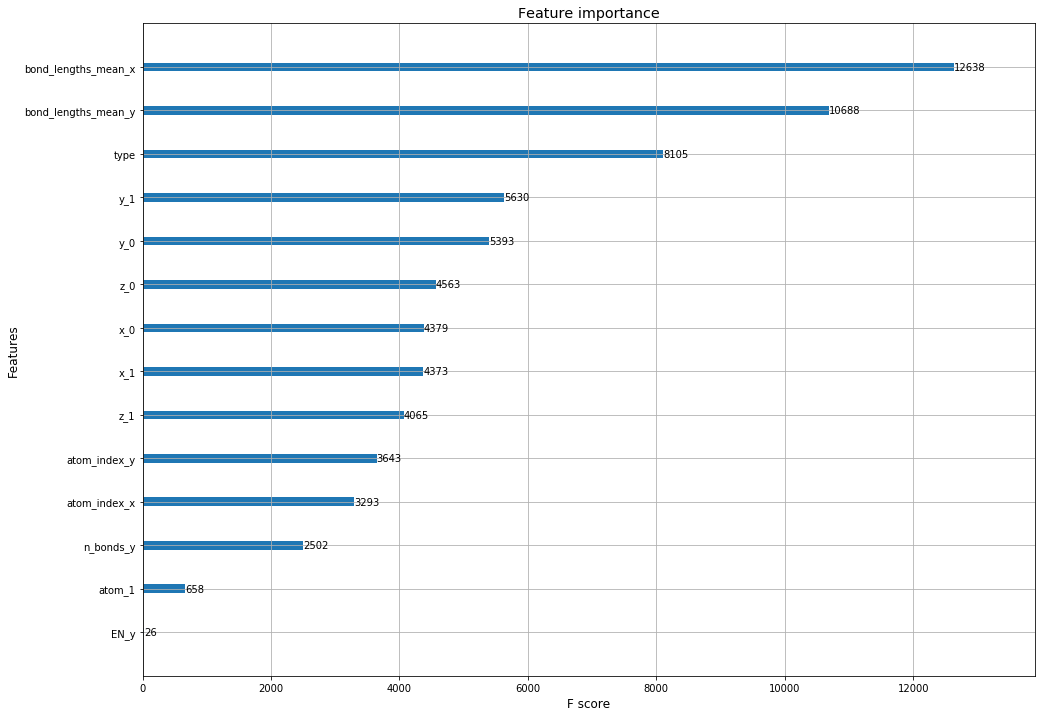

In [104]:
X_train, X_test, y_train = prepare_train()
# initialize XGBRegressor
xgb_model = xgb.XGBRegressor(n_estimators=10000, seed=42, n_jobs=8, objective=reg:squarederror)

xgb_model.fit(X_train, y_train)
y_predict_xgb = xgb_model.predict(X_test)
print('Train score: {}'.format(xgb_model.score(X_train, y_train)))

submit = pd.read_csv(os.path.join(filepath, 'sample_submission.csv')).drop(columns='scalar_coupling_constant')
submit['scalar_coupling_constant'] = y_predict_xgb
submit.to_csv(os.path.join(dir_out, 'submission.csv'), index=False)

fig, axes = plt.subplots()
fig.set_size_inches(16, 12)
xgb.plot_importance(xgb_model, ax=axes)
plt.show()

In [105]:
import subprocess
#subprocess.check_output(['ls','-l']) #all that is technically needed...
print(subprocess.check_output(['pwd']))
subprocess.call(['sh', './submit.sh'])

b'/home/ygong/Documents/Kaggle_July2019/code\n'


0